# Assignment

In this assignment students have to transform iris data into 3 dimensions
and plot a 3d chart with transformed dimensions and colour each data
point with specific class.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

In [2]:
import seaborn as sns

In [3]:
df = sns.load_dataset('iris')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
features = ['sepal_length','sepal_width','petal_length','petal_width']
x = df.loc[:,features]
y = df.loc[:,['species']].values

In [6]:

x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
y

array([['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['versicolor'],
       ['versicolor'],
    

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [14]:
finalDf = pd.concat([principalDf, df[['species']]], axis = 1)
finalDf

,principal component 1,principal component 2,principal component 3,species
0,-2.684126,0.319397,-0.027915,setosa
1,-2.714142,-0.177001,-0.210464,setosa
2,-2.888991,-0.144949,0.017900,setosa
3,-2.745343,-0.318299,0.031559,setosa
4,-2.728717,0.326755,0.090079,setosa
...,...,...,...,...
145,1.944110,0.187532,0.177825,virginica
146,1.527167,-0.375317,-0.121898,virginica
147,1.764346,0.078859,0.130482,virginica
148,1.900942,0.116628,0.723252,virginica


In [15]:

x_vals = finalDf['principal component 1']
y_vals = finalDf['principal component 2']
z_vals = finalDf['principal component 3']

In [16]:
x_vals

0     -2.684126
1     -2.714142
2     -2.888991
3     -2.745343
4     -2.728717
         ...   
145    1.944110
146    1.527167
147    1.764346
148    1.900942
149    1.390189
Name: principal component 1, Length: 150, dtype: float64

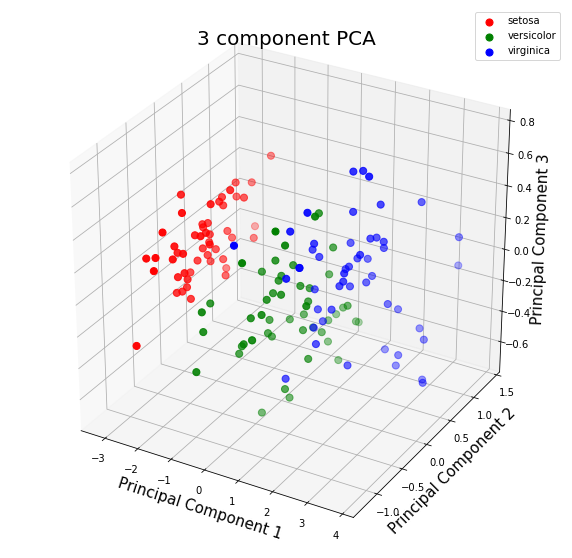

In [41]:
import random
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection ="3d")
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
zz= zip(targets,colors)
for i,j in zz:
    indicesToKeep = finalDf['species'] == i
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = j
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

